# A Simple Linear Regression Implementation in Python 

This is a sequel to my [previous blog post](http://theideasmith.github.io/2016/12/19/An-Introduction-To-The-Theory-Of-Numerical-Optimization.html) where I discussed the fundamental theory of linear regression with gradient descent. 

Here we'll continue our study of gradient descent by implementing it in python. 

To start, I'll import the dependencies

In [1]:
import numpy as np
from pylab import *
%matplotlib inline

Recal that in simple one dimensional regression problems we are given a set of $x,y$ pairs from some unknown function $F(x)$ and are trying to fit some model $f(x,w)$ to best approximate the function $F$ generating the dataset, where $x$ is some $x_i$ from the set of input data and $w$ is a parameter vector we are trying to optimize. 

For any actual $x_i$ in the input dataset, $\hat{y} = f(x_i, w)$ ought to be as close as possible to $F(x)=y_i$. 

The code for implementing regression with gradient descent is actually remarkable simple. 
We'll start by writing an abstract regression class and then subclass it for our specific choice of model and error function. 

In [2]:
class AbstractRegression:
    def __init__(self, xs, ys, w,alpha):
        self.w = w
        self.xs = xs
        self.ys = ys
        self.a = alpha
        self.N = float(len(xs)) # The size of the dataset
    
    
    def f(x,w): return
    def r(yhat, ys, xs): return
   
    
    def update(self):        
        # Updating weights with respect to error
        self.w -= self.a*self.r()


The init method takes `xs`, the set of input $x_i$ input points, `ys` the set of $y=F(x_i)$, `alpha` the learning rate $\alpha$, `w` an initial parameter vector,

In addition, all subclasses must implement three functions: 

- `f` a function of the form `f(x, w)` where `x` is some arbitrary $x$ value, and `w` is a parameter vector. 
- `r` a function of the which returns a vector the same length as `w` where $$r_i = \frac{dE}{dw_i}$$
- `E` the actual error function, as in absolute distance, or mean squared error, etc. Note that `E` is not used in the training but is useful to have handy in the class. 

Now we shall subclass `AbstractRegression` using mean squared error as our error metric and a linear model 
$$f(x, w) = w_1x+w_2$$

In my [previous post](http://theideasmith.github.io/2016/12/19/An-Introduction-To-The-Theory-Of-Numerical-Optimization.html) we derived the learning rates $r$ for such a linear model:

$$r_1 = \frac{1}{N}\sum^N_j{2(\hat{y}_j - y_j)x_j}$$
$$r_2 = \frac{1}{N}\sum^N_j{2(\hat{y}_j - y_j)}$$

and update rule 

$$w_{i, t+1} = w_{i,t} - \alpha r_i$$

With this settled, see how incredible simple it is to implement this powerful tool:


In [3]:
class LinearRegression(AbstractRegression):
    
    def f(self, x,w): 
        return w[0]*x + w[1]
    
    def r(self):
        yhats = self.f(self.xs,self.w) 
        loss = yhats - self.ys
        return np.array([
              (2./self.N)*np.sum(loss*xs),
              (2./self.N)*np.sum(loss)  
        ])

Now let's test this out:

/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[  9.65885386  99.69371247]


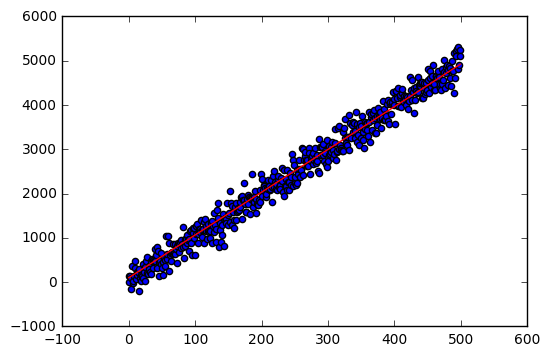

In [4]:
N = 500.
m = 10.
b = 10.

ws = np.array([100.,100.])
xs = np.arange(0,N)
ys = m*xs + b + np.random.randn(N)*200

regressor = LinearRegression(
    xs, ys, ws,
    0.0000001)

for i in range(10000):
    regressor.update()

w= regressor.w 
print w
yhat = xs * w[0] + w[1]
actual = scatter(xs, ys)
predicted = plot(xs, yhat, color='red')